<a href="https://www.kaggle.com/khaiid/98-predicting-breast-cancer-knn-svc-lr-rfc?scriptVersionId=87938224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports needed

In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Reading and cleaning the data

In [163]:
cancer = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [164]:
#Check the head of the data
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:>

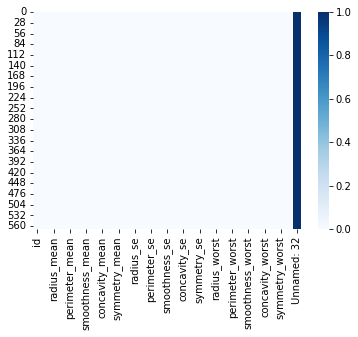

In [165]:
#Heatmap for all null values
sns.heatmap(cancer.isnull(),cmap='Blues')

In [166]:
#Drop unnamed column & replace diagnosis with numerical values
cancer.drop('Unnamed: 32',axis=1,inplace=True)
cancer.diagnosis = [1 if each == "M" else 0 for each in cancer.diagnosis]

# EDA

<AxesSubplot:>

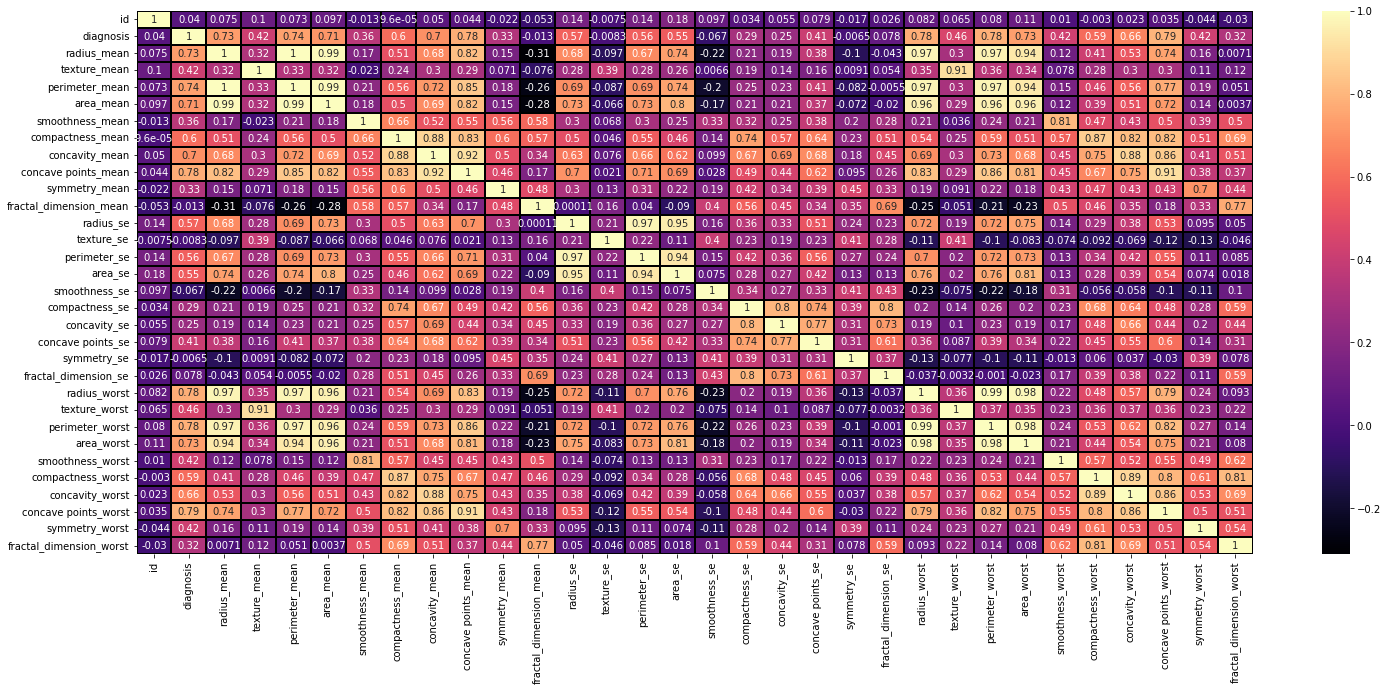

In [167]:
#Heatmap for all correlations
plt.figure(figsize = (25, 10))
sns.heatmap(cancer.corr(),cmap='magma',linewidths=2,linecolor='black',annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

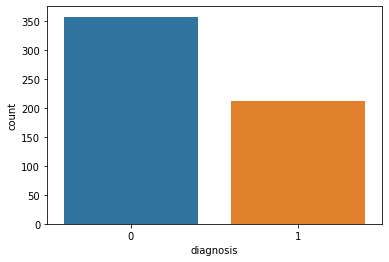

In [168]:
sns.countplot(cancer['diagnosis'])

# Train Test Split

In [169]:
#Choosing features and label
Features = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

Label = cancer['diagnosis']

In [170]:
# Scaling the data

scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier

## Choosing best n_neighbors value

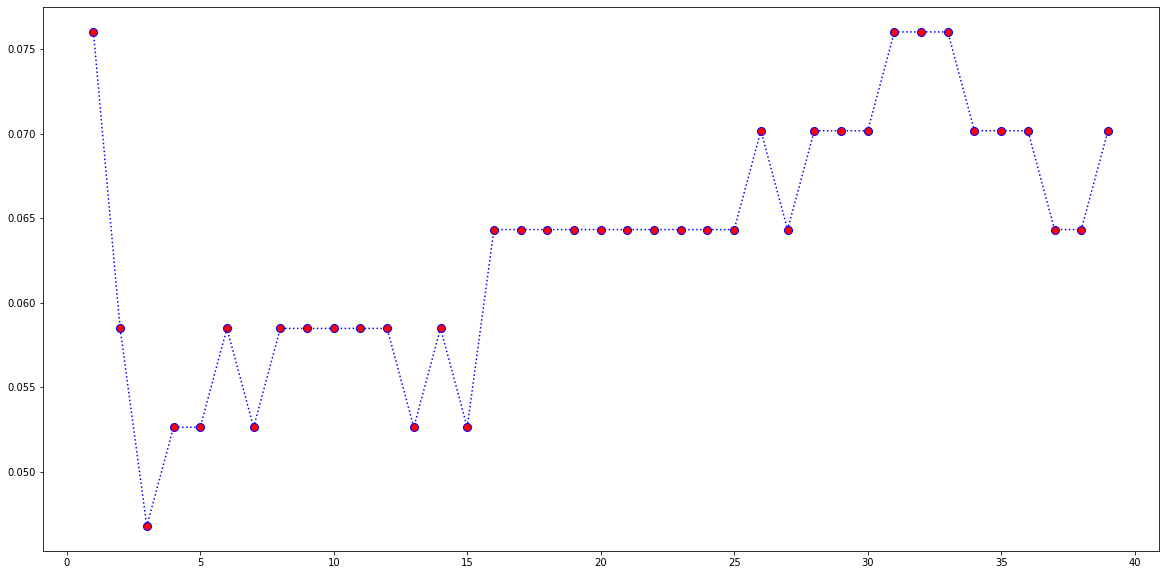

In [174]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

# Training the model

In [215]:
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [216]:
knnpred = knn.predict(X_test)

In [217]:
print('KNN Classifier' + '\n')
print(classification_report(y_test,knnpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,knnpred))

KNN Classifier

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.97      0.91      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


confusion matrix
[[101   2]
 [  6  62]]


<AxesSubplot:>

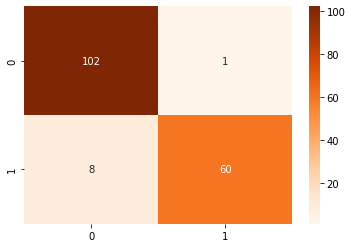

In [178]:
#confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test,knnpred), annot=True,cmap='Oranges',fmt='g')

# Support Vector Classifier SVC

In [179]:
from sklearn.svm import SVC
sup = SVC(C=1,kernel='rbf',cache_size=200)
sup.fit(X_train,y_train)

SVC(C=1)

In [180]:
svcpred = sup.predict(X_test)

In [181]:
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,svcpred))

Support Vector Classifier

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       1.00      0.93      0.96        68

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


confusion matrix
[[103   0]
 [  5  63]]


<AxesSubplot:>

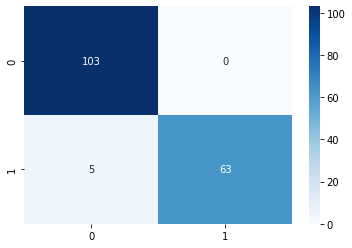

In [182]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,svcpred), annot=True,cmap='Blues',fmt='g')

# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='liblinear',C=1,max_iter=30,multi_class='auto')

In [184]:
logr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=30, solver='liblinear')

In [185]:
logpred = logr.predict(X_test)

In [186]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,logpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,logpred))

Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       103
           1       0.98      0.96      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171


confusion matrix
[[102   1]
 [  3  65]]


<AxesSubplot:>

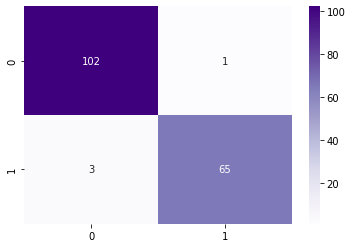

In [187]:
#confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test,logpred), annot=True,cmap='Purples',fmt='g')

# Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

## Finding best n_estimators value

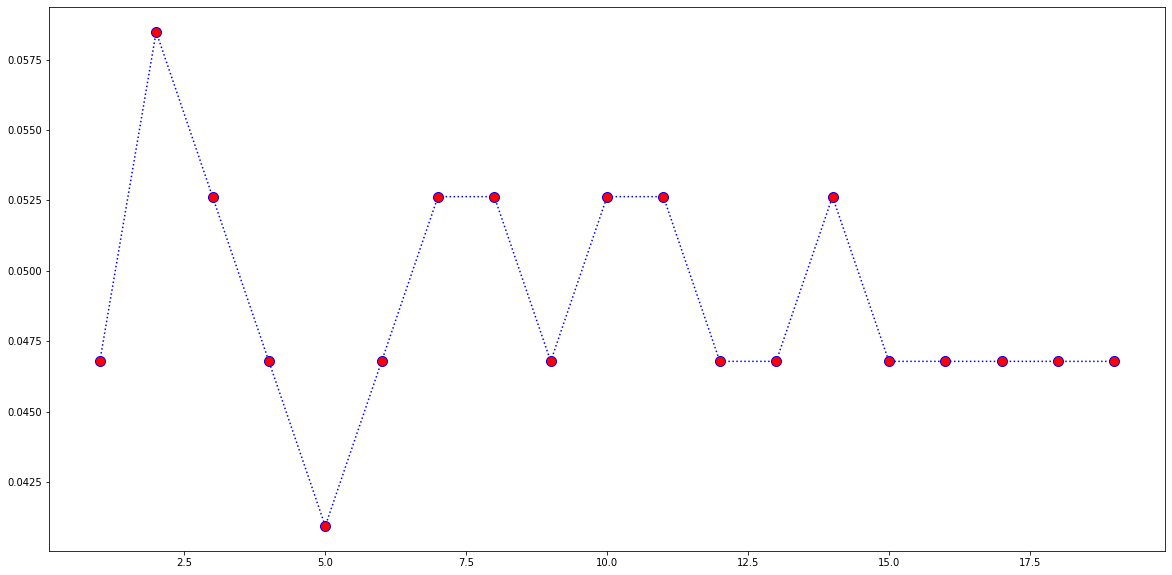

In [189]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 20
    rfe = RandomForestClassifier(n_estimators=i*10) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

In [197]:
rfc = RandomForestClassifier(n_estimators=50,max_features='auto', max_depth=9)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

In [198]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,rfcpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,rfcpred))

Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.95      0.93      0.94        68

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


confusion matrix
[[100   3]
 [  5  63]]


<AxesSubplot:>

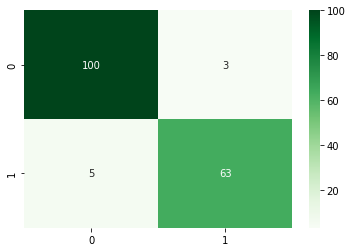

In [199]:
#confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test,rfcpred), annot=True,cmap='Greens',fmt='g')

# Feature importance

<AxesSubplot:ylabel='None'>

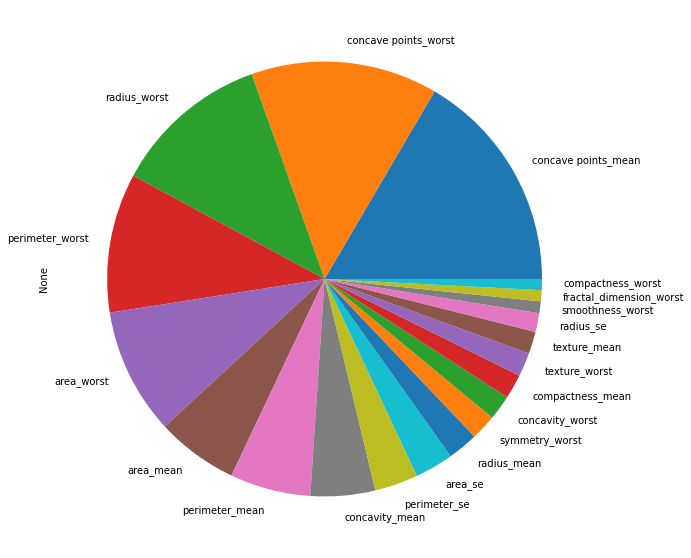

In [208]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances

plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nlargest(20).plot(kind='pie')

## Thank you, feel free to ask any question or add any comment !

### Thank you ! Feel free to add any comment or question.